In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
%matplotlib inline

# Loading data 

In [2]:
train = pd.read_hdf('train.h5')

# Feature exploring using clean data 

In [3]:
train_sub = train.dropna(how='any')

In [4]:
train_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223040 entries, 146024 to 1710750
Columns: 111 entries, id to y
dtypes: float32(109), int16(2)
memory usage: 95.3 MB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710756 entries, 0 to 1710755
Columns: 111 entries, id to y
dtypes: float32(109), int16(2)
memory usage: 730.9 MB


Only 13% data are complete 

# Using ExtraTreeRegression to extract importance on 13% data 

In [5]:
y = train_sub.y
train_sub.drop('y', axis=1, inplace=True)

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [6]:
ETR = ExtraTreesRegressor(n_jobs=-1, n_estimators=50)

In [7]:
ETR.fit(train_sub, y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [8]:
importance = pd.DataFrame({'Feature': train_sub.columns, 'Importance': ETR.feature_importances_})

In [9]:
importance = importance.sort_values('Importance', ascending=False)

In [10]:
importance

,Feature,Importance
98,technical_33,0.036761
95,technical_30,0.033744
106,technical_41,0.033199
90,technical_24,0.031227
73,technical_3,0.030319
87,technical_20,0.029992
71,technical_1,0.028743
74,technical_5,0.028305
91,technical_25,0.027320
96,technical_31,0.026916


### Let's extract importance on original data 

In [4]:
corref_with_y = {}
for col in train.columns[0:-1]:
    print('Process feature: ', col)
    clean_col = train.loc[train[col].notnull(), [col, 'y']]
    corref_with_y[col] = np.corrcoef(clean_col[col], clean_col['y'])[0][1]
    

Process feature:  id
Process feature:  timestamp
Process feature:  derived_0
Process feature:  derived_1
Process feature:  derived_2
Process feature:  derived_3
Process feature:  derived_4
Process feature:  fundamental_0
Process feature:  fundamental_1
Process feature:  fundamental_2
Process feature:  fundamental_3
Process feature:  fundamental_5
Process feature:  fundamental_6
Process feature:  fundamental_7
Process feature:  fundamental_8
Process feature:  fundamental_9
Process feature:  fundamental_10
Process feature:  fundamental_11
Process feature:  fundamental_12
Process feature:  fundamental_13
Process feature:  fundamental_14
Process feature:  fundamental_15
Process feature:  fundamental_16
Process feature:  fundamental_17
Process feature:  fundamental_18
Process feature:  fundamental_19
Process feature:  fundamental_20
Process feature:  fundamental_21
Process feature:  fundamental_22
Process feature:  fundamental_23
Process feature:  fundamental_24
Process feature:  fundamenta

In [7]:
sorted_corref = sorted(corref_with_y.items(), key=lambda x: np.abs(x[1]), reverse=True)

In [8]:
sorted_corref

[('technical_20', -0.016534254309604736),
 ('technical_30', 0.01427159860604372),
 ('fundamental_11', 0.0081511706225633369),
 ('technical_27', -0.0080917673767511421),
 ('technical_19', -0.0076465113423604333),
 ('fundamental_51', 0.0060127832839777925),
 ('fundamental_53', 0.0060090467837527507),
 ('technical_35', -0.0060087053241060307),
 ('technical_36', -0.0059015177517604397),
 ('technical_11', -0.0054465794422677537),
 ('technical_2', -0.0053810932526305926),
 ('fundamental_18', 0.0051230664432200968),
 ('technical_43', -0.004970947115478604),
 ('technical_0', 0.0043280009717972072),
 ('technical_6', -0.0042928432602953514),
 ('fundamental_62', -0.0041356115329543178),
 ('technical_29', -0.0039238758846596843),
 ('fundamental_55', 0.0038462547468007869),
 ('technical_14', -0.0038013430038576416),
 ('technical_37', 0.0037828401474539735),
 ('fundamental_60', 0.0034207500506516146),
 ('fundamental_23', -0.0029975459701526964),
 ('fundamental_56', 0.0029258573733253065),
 ('technic

seems `technical_20` and `technical_30` have some linear connections with `y`, while others not

In [12]:
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline

In [10]:
tec20_cols = train.loc[train['technical_20'].notnull(), ['technical_20', 'y']]
tec30_cols = train.loc[train['technical_30'].notnull(), ['technical_30', 'y']]

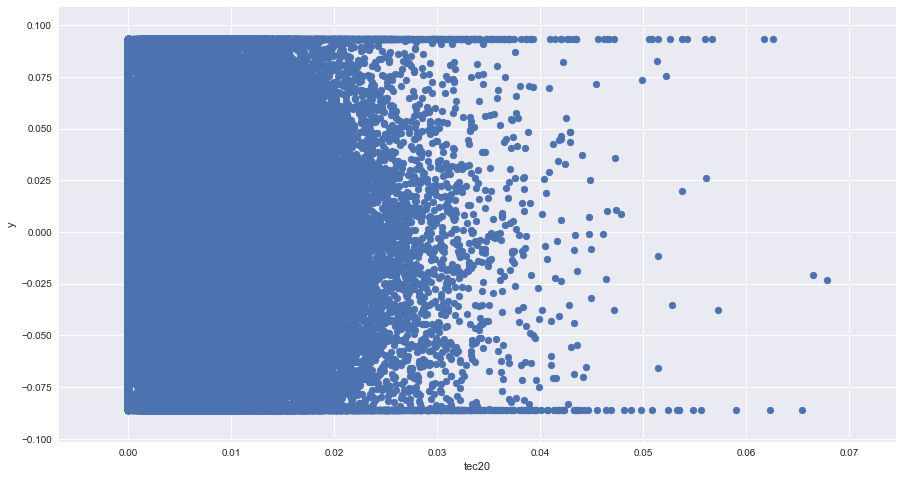

In [15]:
plt.figure(figsize=(15,8))
plt.scatter(tec20_cols.technical_20, tec20_cols.y)
plt.xlabel('tec20')
plt.ylabel('y')

no obvious patterns 

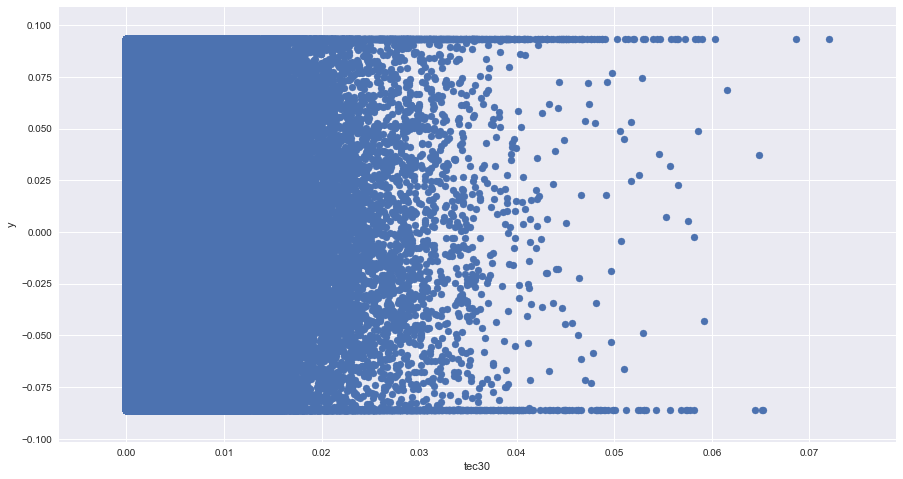

In [16]:
plt.figure(figsize=(15,8))
plt.scatter(tec30_cols.technical_30, tec30_cols.y)
plt.xlabel('tec30')
plt.ylabel('y')

# Let's see if there's pattern between features
since 110 features in total, there's:
$C_{110}^2=\frac{110 \times109}{2}=5995$ combinations, that's would be insane, let's start with `technical_20` and `technical_30` first

In [17]:
110 * 109 / 2

5995.0

In [25]:
def feature_corref(data, target_col, cols):
    corref = {}
    cols.remove(target_col)
    for col in cols:
        clean_cols = data.loc[data[target_col].notnull() & data[col].notnull(), [target_col, col]]
        corref[col] = np.corrcoef(clean_cols[col], clean_cols[target_col])[0][1]
    return sorted(corref.items(), key=lambda x : np.abs(x[1]), reverse=True)

In [26]:
tec20_corr = feature_corref(train, 'technical_20', list(train.columns))

In [53]:
tec20_corr[:10]

[('technical_13', -0.24307351515889786),
 ('technical_22', 0.22940533230742002),
 ('technical_30', -0.22196713877245849),
 ('technical_7', 0.16180982664392768),
 ('technical_40', 0.16134480364204226),
 ('fundamental_54', 0.11780347820583392),
 ('fundamental_21', 0.11118748729814094),
 ('technical_29', -0.10948770000366022),
 ('fundamental_60', 0.10543836988072655),
 ('technical_14', -0.099060848674140015)]

much strong connections!

In [10]:
def scatter_plot(data, col_1, col_2):
    clean_cols = data.loc[data[col_1].notnull() & data[col_2].notnull(), [col_1, col_2]]
    plt.figure(figsize=(15,8))
    plt.scatter(clean_cols[col_1], clean_cols[col_2])
    plt.xlabel(col_1)
    plt.ylabel(col_2)

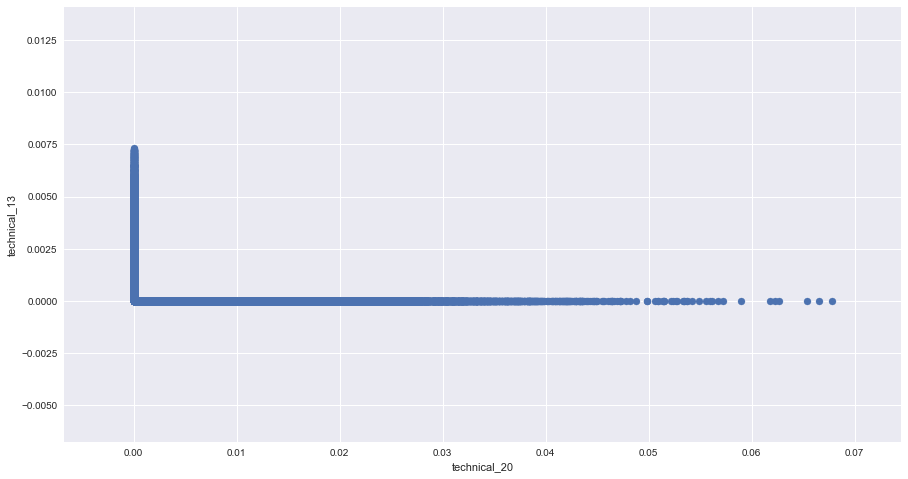

In [30]:
scatter_plot(train, 'technical_20', 'technical_13')

that's really something!!! $tech_{20} \times tech_{13}=0$

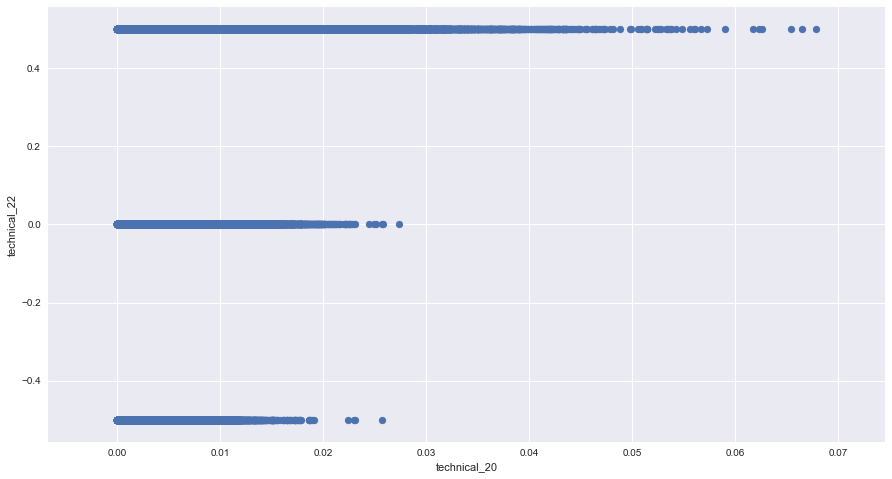

In [31]:
scatter_plot(train, 'technical_20', 'technical_22')

In [37]:
tech22 = train.loc[train['technical_20'].notnull() & train['technical_22'].notnull(), 'technical_22']

In [52]:
tech22.loc[tech22 < -0.4].mean()

-0.5

In [42]:
tech22.loc[tech22 > 0.4].mean()

0.5

In [50]:
tech22.shape

(1705992,)

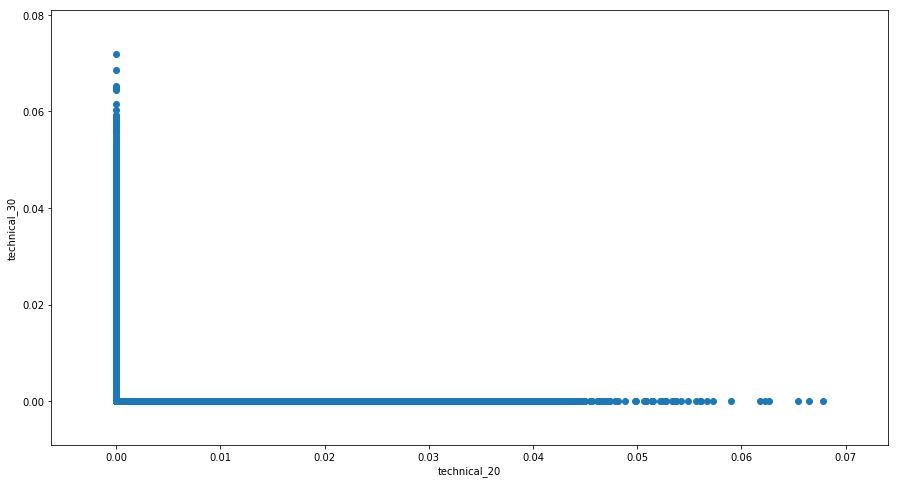

In [25]:
scatter_plot(train, 'technical_20', 'technical_30')

just like `technical_13`

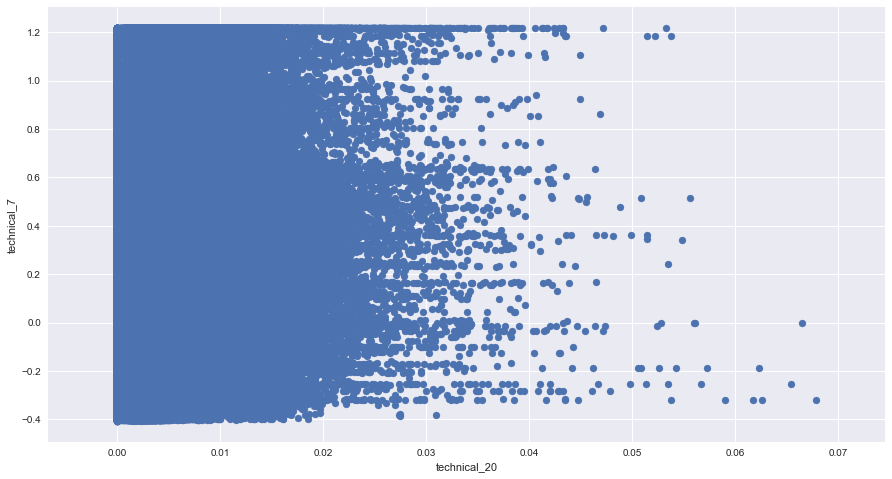

In [33]:
scatter_plot(train, 'technical_20', 'technical_7')

not much patterns here

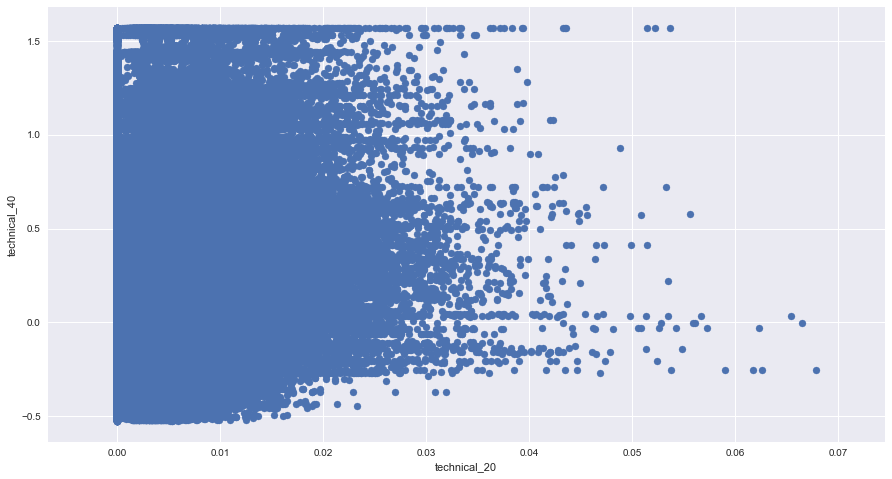

In [34]:
scatter_plot(train, 'technical_20', 'technical_40')

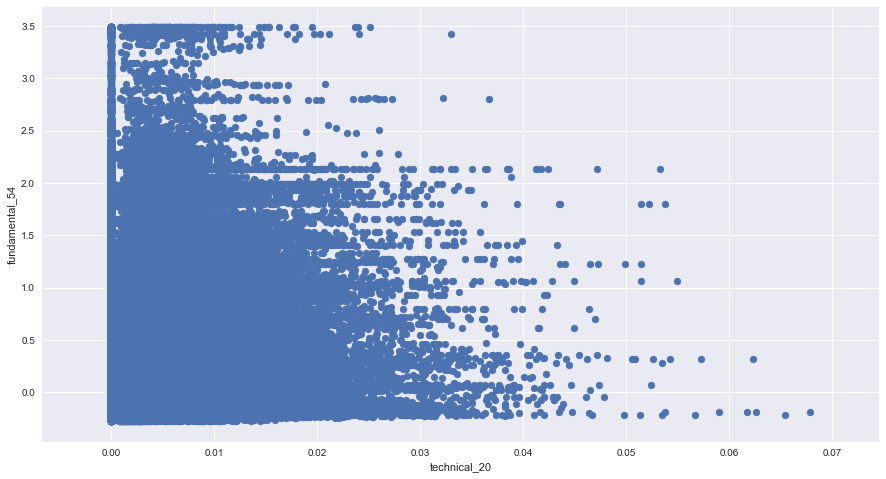

In [35]:
scatter_plot(train, 'technical_20', 'fundamental_54')

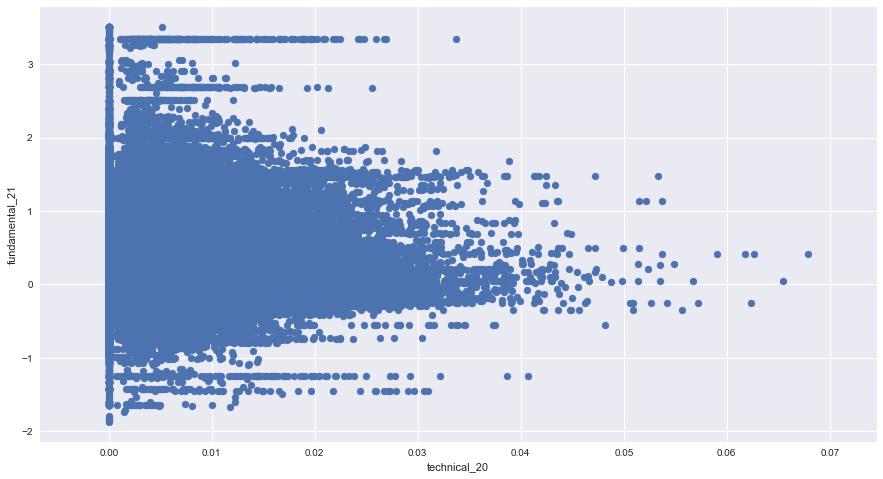

In [36]:
scatter_plot(train, 'technical_20', 'fundamental_21')

there's patterns between `technical_20` and `fundamental_21`, `fundamental_53`, `technical_40`, but not so obvious

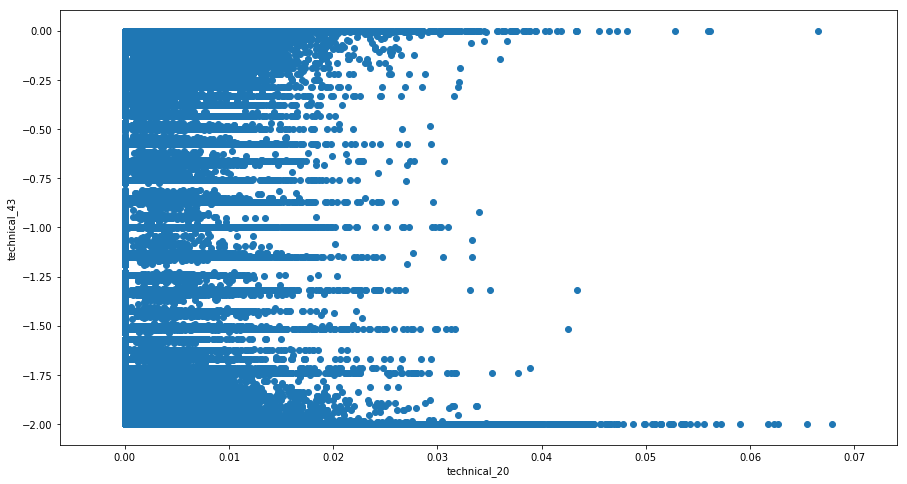

In [27]:
scatter_plot(train, 'technical_20', 'technical_43')

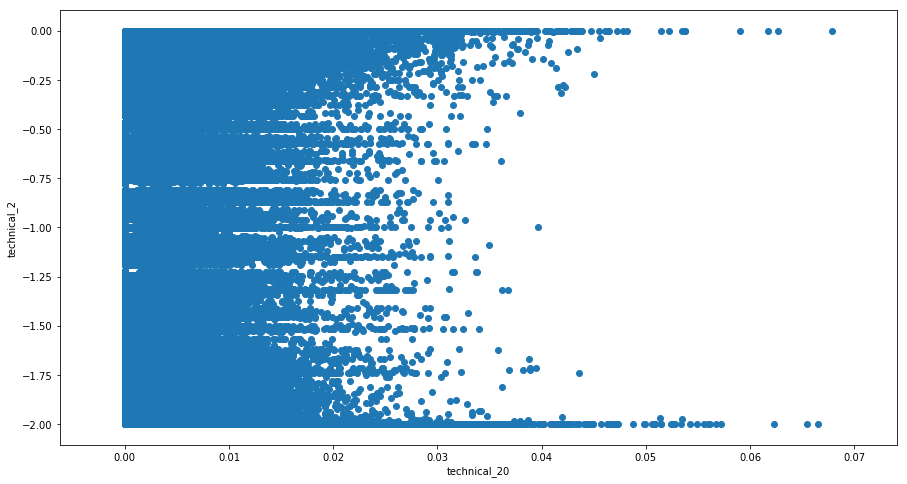

In [28]:
scatter_plot(train, 'technical_20', 'technical_2')

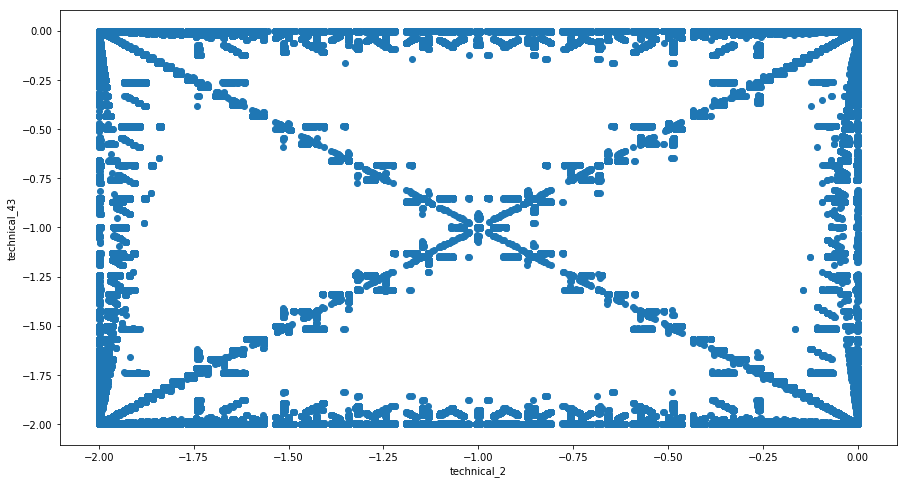

In [29]:
scatter_plot(train, 'technical_2', 'technical_43')

## `technical_30` 

In [43]:
tech30_corr = feature_corref(train, 'technical_30', list(train.columns))

In [46]:
tech30_corr[:10]

[('technical_20', -0.22196713877245849),
 ('technical_13', -0.21348100539725332),
 ('technical_22', 0.21210359981070959),
 ('technical_40', 0.15974097504043727),
 ('technical_11', -0.15214204105591742),
 ('technical_7', 0.15208927901158198),
 ('technical_2', -0.14977416131854548),
 ('technical_27', -0.14846653678015403),
 ('technical_19', -0.14551142618894597),
 ('technical_17', -0.13951157443930165)]

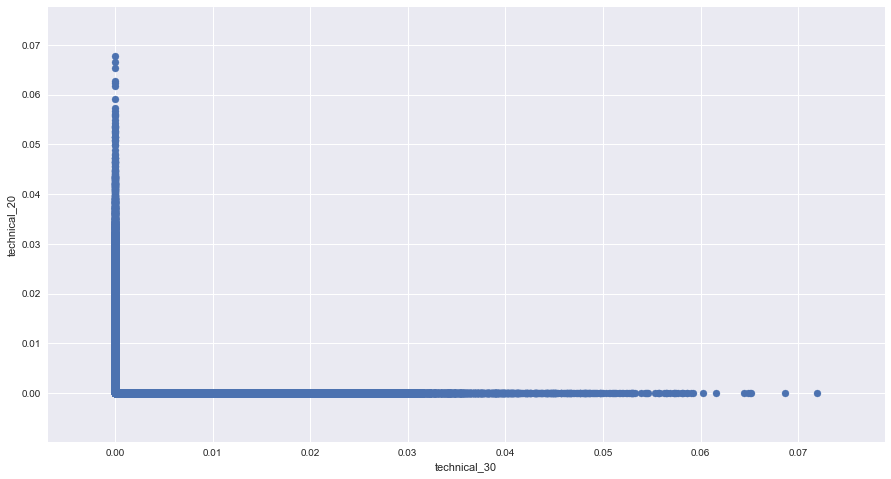

In [57]:
scatter_plot(train, 'technical_30', 'technical_20')

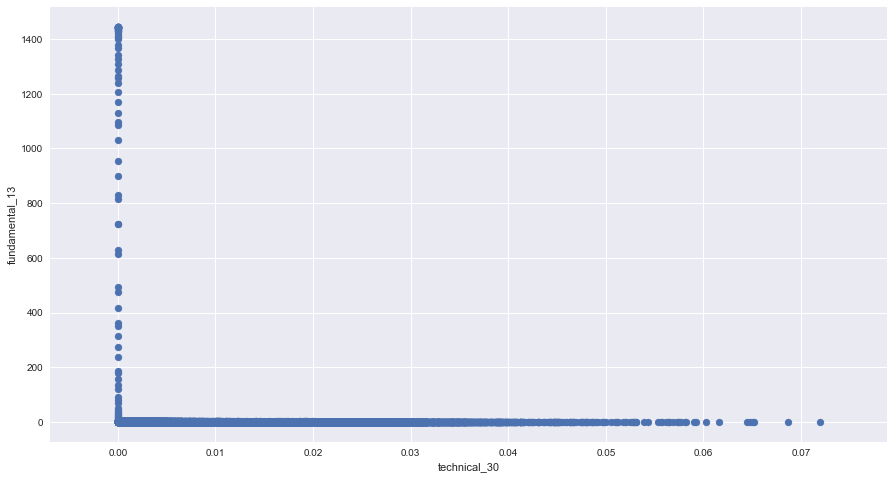

In [47]:
scatter_plot(train, 'technical_30', 'technical_13')

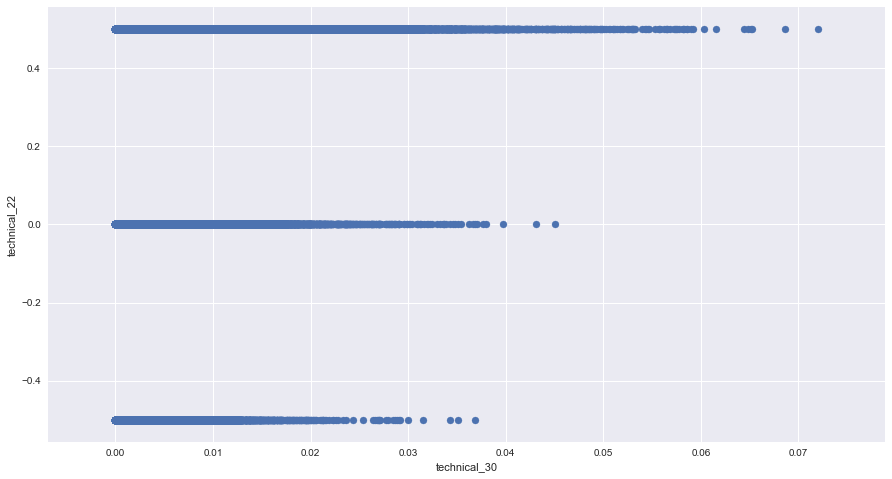

In [58]:
scatter_plot(train, 'technical_30', 'technical_22')

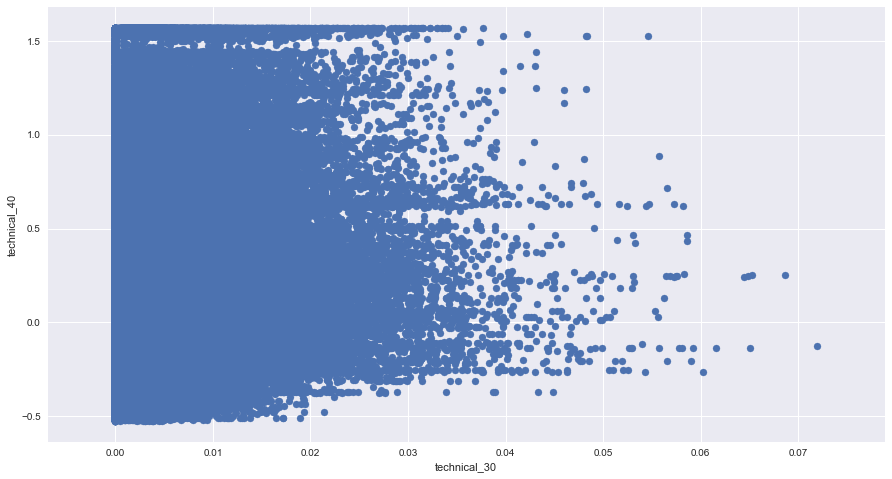

In [59]:
scatter_plot(train, 'technical_30', 'technical_40')

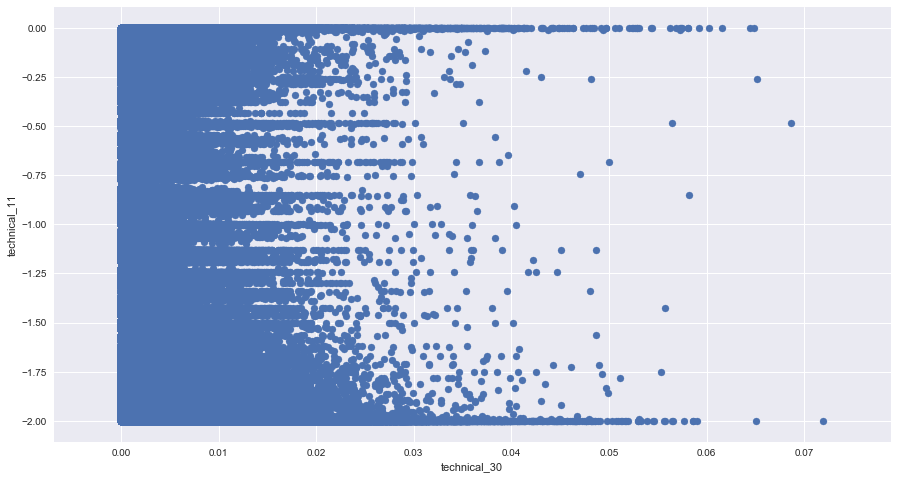

In [60]:
scatter_plot(train, 'technical_30', 'technical_11')

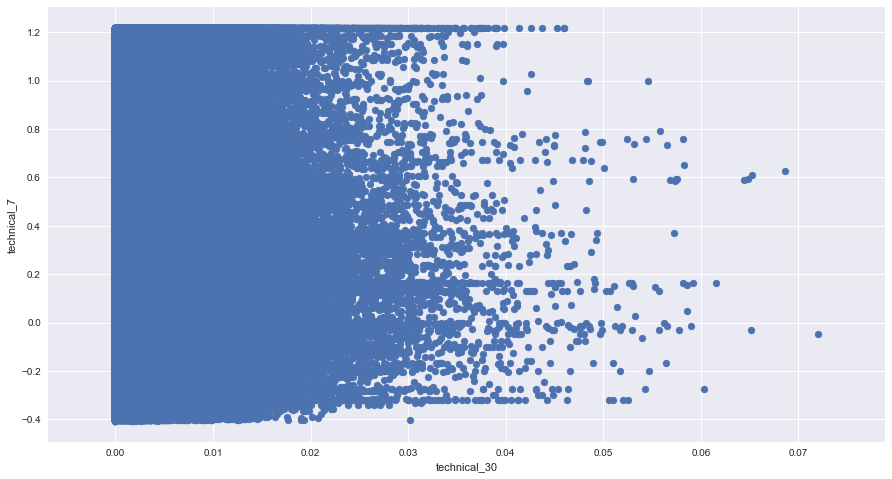

In [61]:
scatter_plot(train, 'technical_30', 'technical_7')

## we'll try `technical_22` next
because `technical_22` has no missing value and it got some interesting distribution 

In [62]:
tech22_corr = feature_corref(train, 'technical_22', list(train.columns))

In [64]:
tech22_corr[:15]

[('technical_40', 0.60868522714161855),
 ('technical_7', 0.53657077578859147),
 ('fundamental_21', 0.40695569385012453),
 ('fundamental_54', 0.3609230432753967),
 ('fundamental_59', 0.34141875043030467),
 ('technical_20', 0.22940533230742),
 ('fundamental_63', 0.22909777499986553),
 ('fundamental_43', 0.21988374514252854),
 ('technical_30', 0.21210359981070959),
 ('fundamental_60', 0.20759121716823672),
 ('technical_29', -0.19326517002897936),
 ('technical_14', -0.19265807905824089),
 ('fundamental_0', 0.18541675363106661),
 ('technical_10', -0.17391394350459113),
 ('technical_35', -0.15170185017934823)]

 **bingo!** I think we can cluster data according to `technical_22` , let's plot distribution of `technical_22`

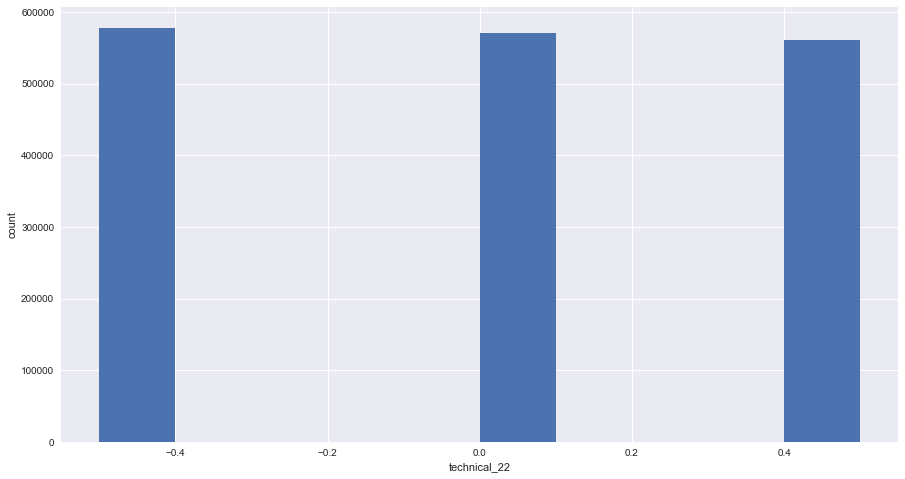

In [66]:
plt.figure(figsize=(15,8))
plt.hist(train.technical_22)
plt.xlabel('technical_22')
plt.ylabel('count')

awesome! we can devide data into 3 categories:
* A : `technical_22` < -0.2
* B : `technical_22` > 0.2
* C : otherwise


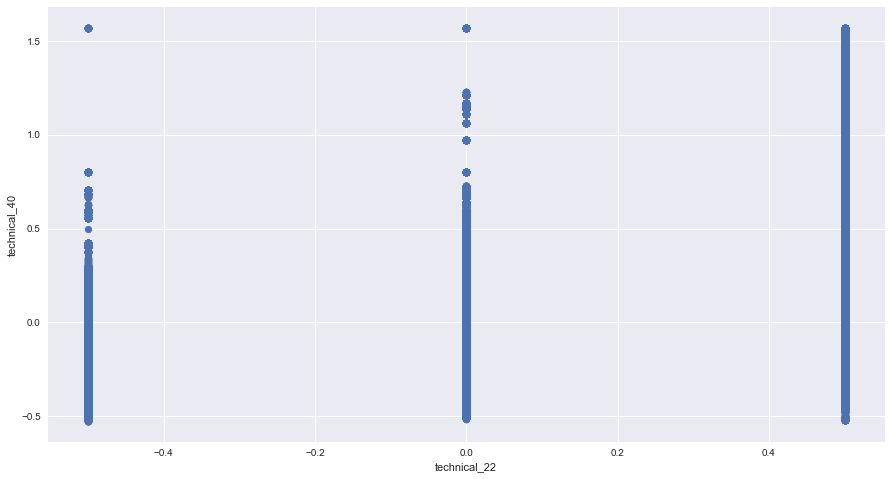

In [67]:
scatter_plot(train, 'technical_22', 'technical_40')

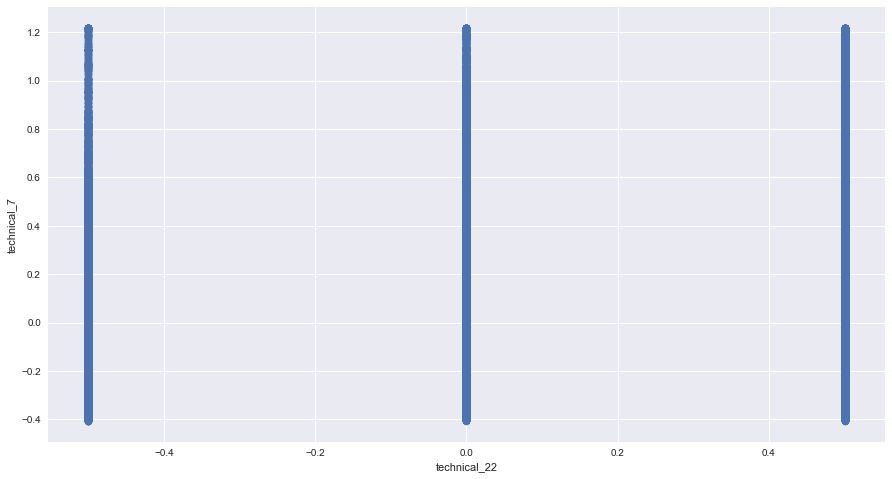

In [68]:
scatter_plot(train, 'technical_22', 'technical_7')

nothing here

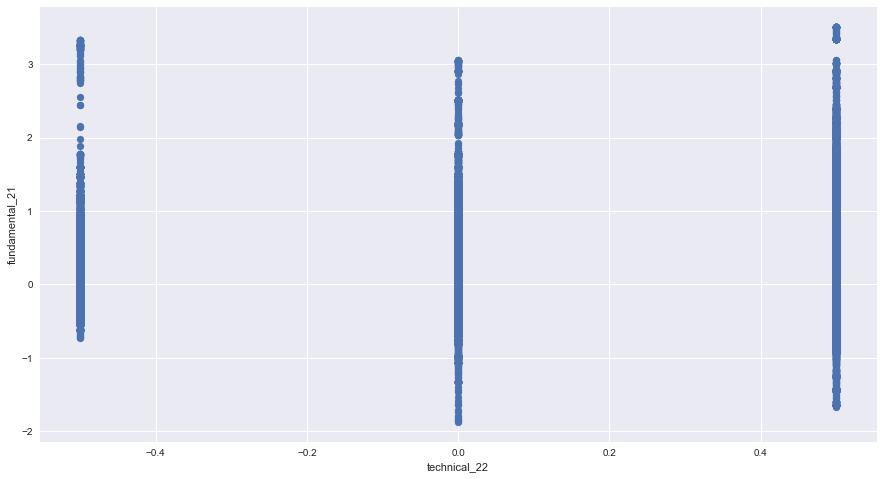

In [69]:
scatter_plot(train, 'technical_22', 'fundamental_21')

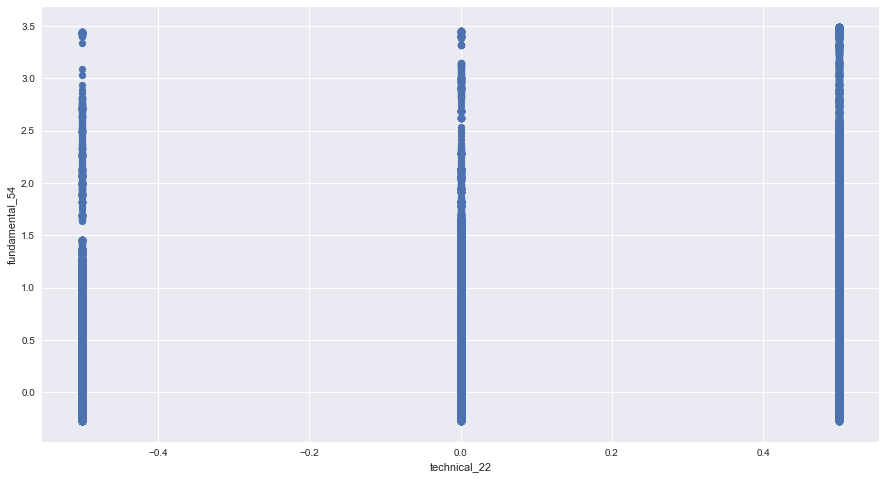

In [70]:
scatter_plot(train, 'technical_22', 'fundamental_54')

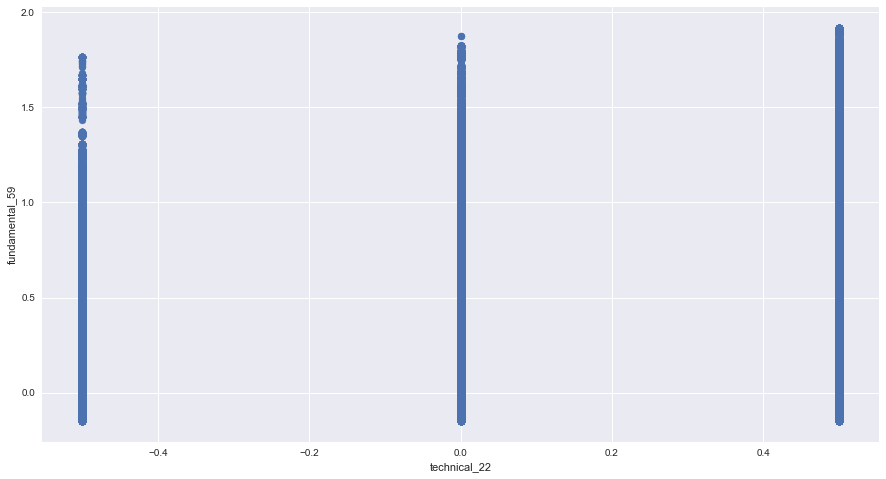

In [71]:
scatter_plot(train, 'technical_22', 'fundamental_59')

See how `technical_22` affects `y`, don't expect too much though...

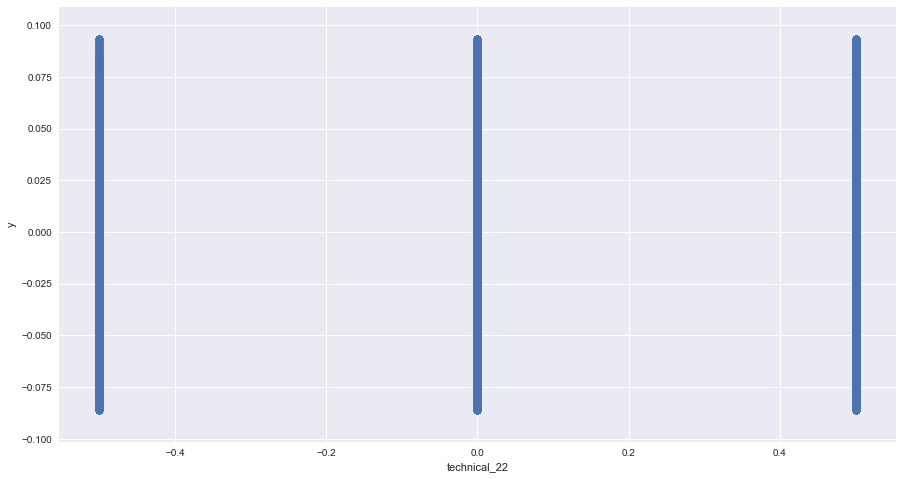

In [72]:
scatter_plot(train, 'technical_22', 'y')

seem's classifying data according to `technical_22` would not be helpful...
## move to `technical_40`

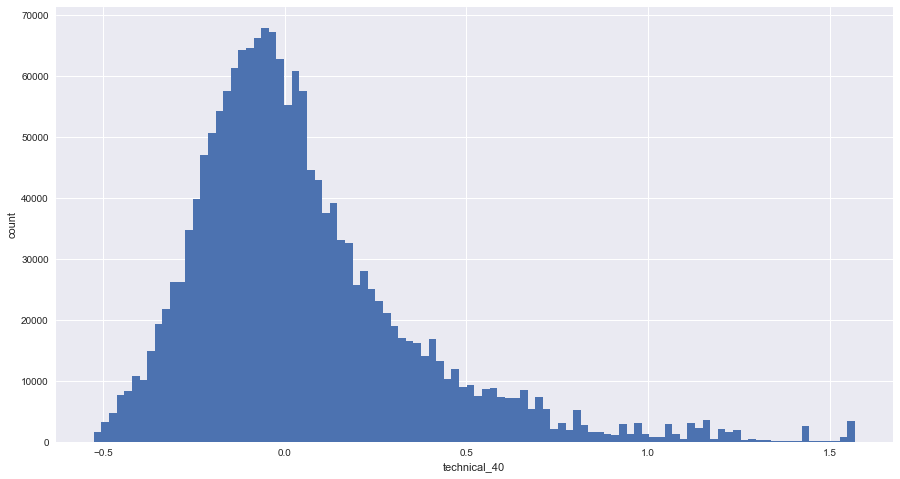

In [78]:
plt.figure(figsize=(15,8))
plt.hist(train[train.technical_40.notnull()].technical_40, bins=100)
plt.xlabel('technical_40')
plt.ylabel('count')

In [79]:
tech40_corr = feature_corref(train, 'technical_40', list(train.columns))

In [82]:
tech40_corr[:13]

[('technical_7', 0.67461139529308434),
 ('technical_22', 0.60868522714161843),
 ('fundamental_21', 0.45240003505944659),
 ('fundamental_59', 0.3956402625302704),
 ('fundamental_54', 0.38683399539010332),
 ('fundamental_43', 0.28527101592510884),
 ('technical_35', -0.22111422593050528),
 ('fundamental_0', 0.20717119953400351),
 ('technical_36', -0.1845738700853588),
 ('technical_29', -0.18238738345713304),
 ('fundamental_60', 0.18160325780772374),
 ('technical_14', -0.17127689574380062),
 ('technical_10', -0.16212429714280355)]

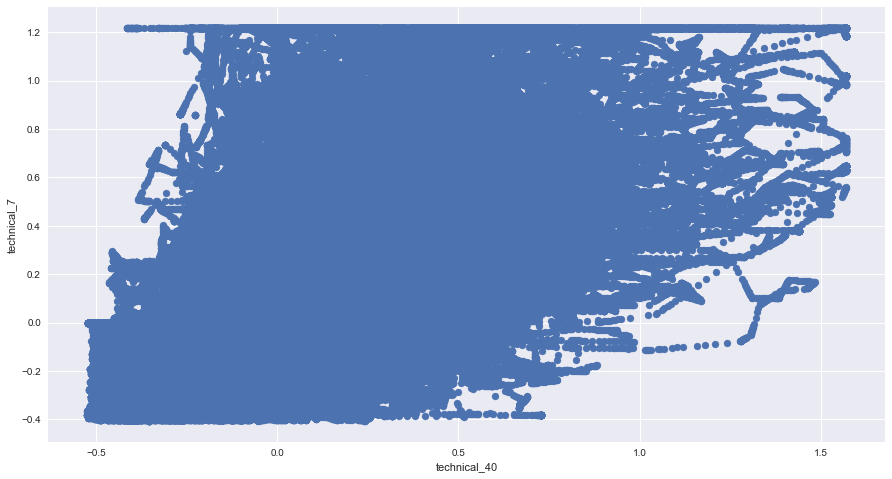

In [83]:
scatter_plot(train, 'technical_40', 'technical_7')

In [4]:
clf = LinearRegression(n_jobs=-1)
clean_cols = train[['technical_40', 'technical_7']].dropna(how='any')
clf.fit(np.array(clean_cols.technical_40.values).reshape(-1, 1), np.array(clean_cols.technical_7.values).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [7]:
clf.coef_

array([[ 0.74216837]])

In [8]:
clf.intercept_

array([ 0.01417423])

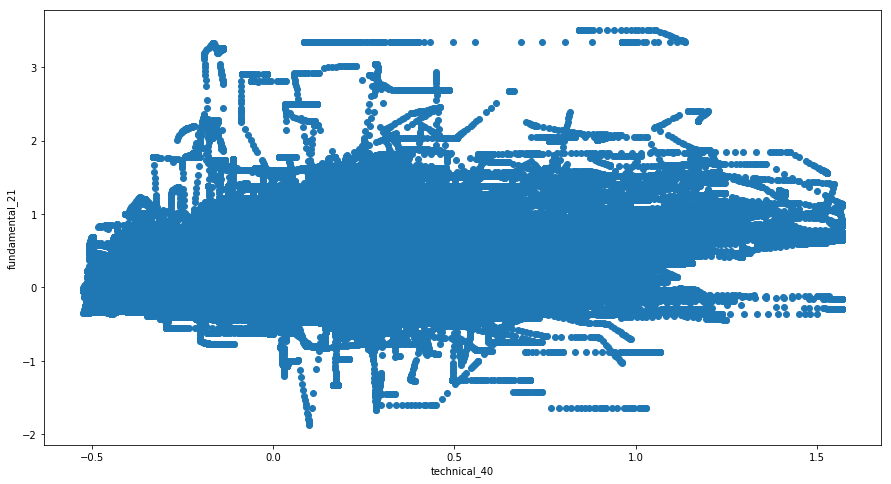

In [15]:
scatter_plot(train, 'technical_40', 'fundamental_21')

In [20]:
clf = LinearRegression(n_jobs=-1)
clean_cols = train[['technical_40', 'technical_21']].dropna(how='any')
clf.fit(np.array(clean_cols.technical_40.values).reshape(-1, 1), np.array(clean_cols.technical_21.values).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [21]:
clf.coef_

array([[-0.05133088]])

In [22]:
clf.intercept_

array([-0.0104304])

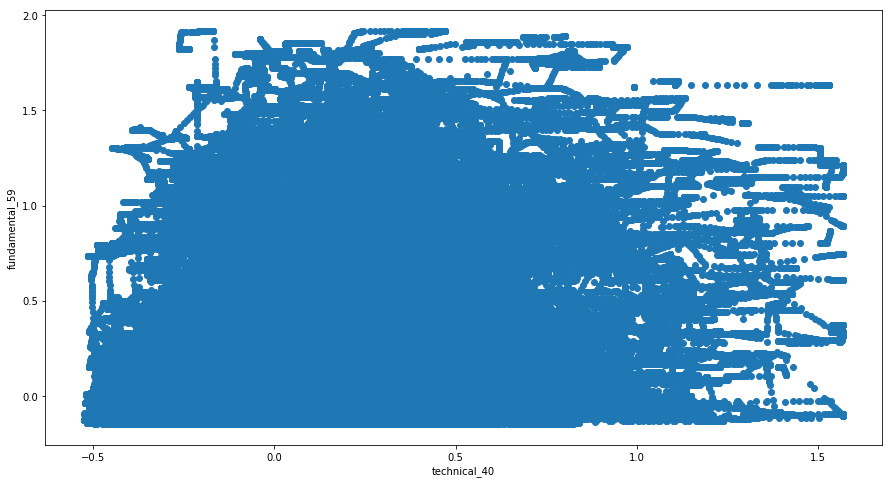

In [16]:
scatter_plot(train, 'technical_40', 'fundamental_59')

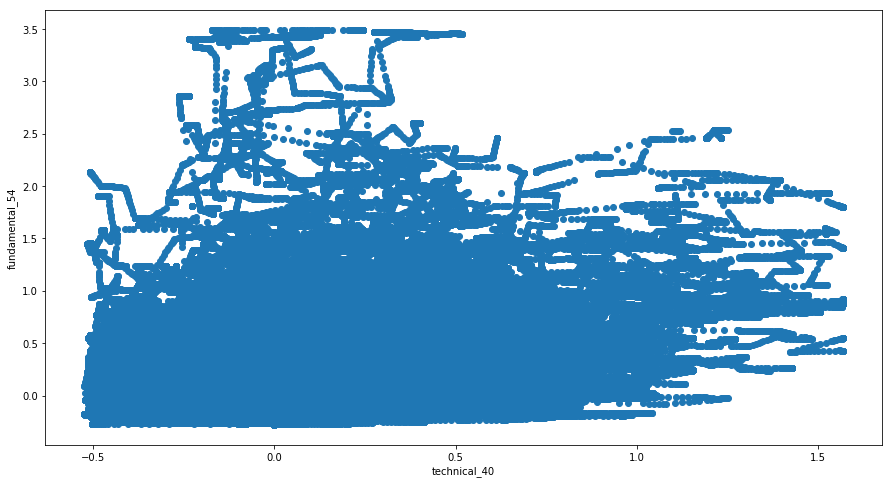

In [24]:
scatter_plot(train, 'technical_40', 'fundamental_54')

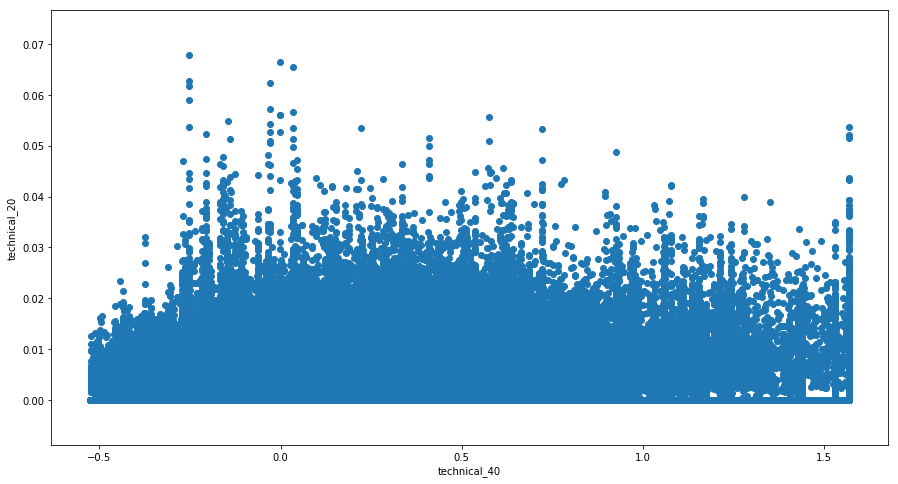

In [30]:
scatter_plot(train, 'technical_40', 'technical_20')

# Plot all features against `technical_20` 

In [ ]:
for col in train.columns:
    if not col in ['id', 'timestamp', 'y', 'technical_20']:
        scatter_plot(train, 'technical_20', col)

/usr/local/lib/python3.4/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
